In [93]:
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [94]:
raw_df = pd.read_csv("rainfall_prediction.csv")

In [95]:
df = raw_df.copy()

In [96]:
df.shape

(8425, 23)

In [97]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [100]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<AxesSubplot:>

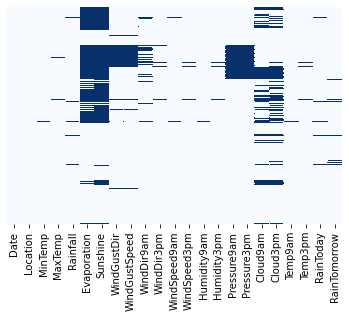

In [101]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

In [102]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Finding Categorical and Numerical Features in a Data set

In [103]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [104]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Cardinality check for Categorical features

In [105]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


# Feature Engineering of Date column to decrease high cardinality

In [106]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [107]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Handling Missing Values

Handling Missing values in Categorical Features

In [108]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [109]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

Handling Missing values in Numerical features

In [110]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

# Outliers detection and treatment

In [111]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

Now, numerical features are free from outliers. Let’s Impute missing values in numerical features using mean.

In [112]:
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [113]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int64
month              int64
day                int64
dtype: object

In [114]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.119906,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.119906,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.119906,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.119906,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.119906,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


# EDA

In [23]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

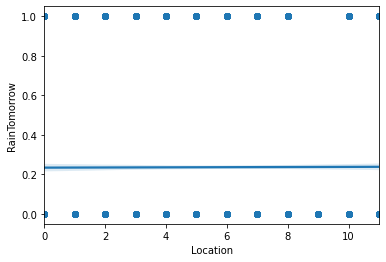

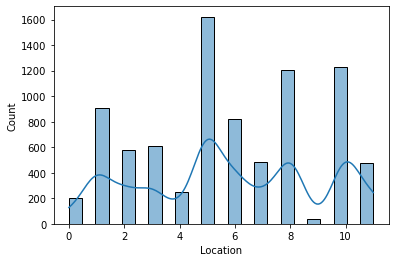

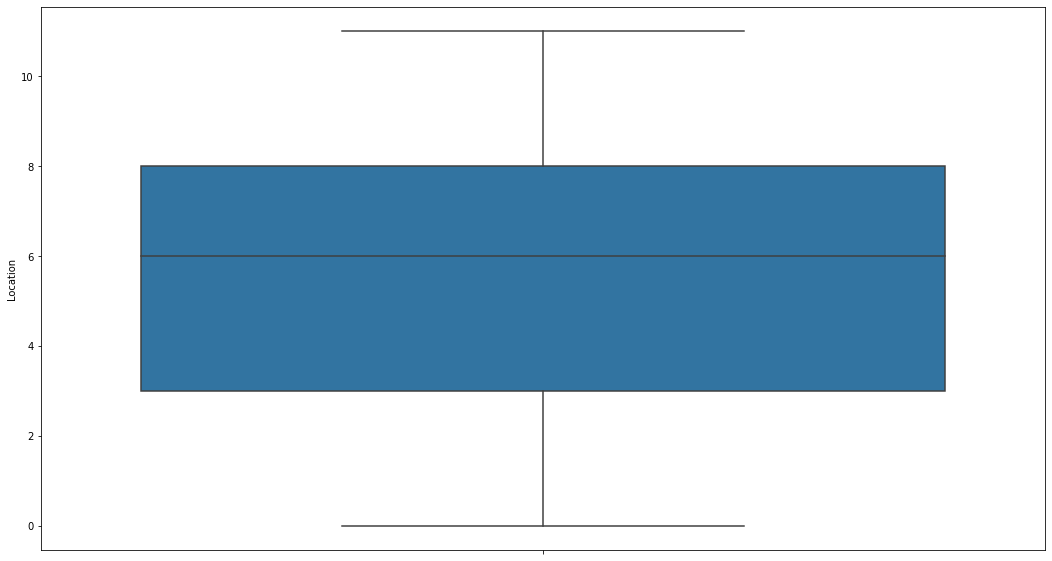

In [33]:
import seaborn as sns
sns.regplot(x="Location",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Location',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Location',data=df)
plt.show()


The data is normal skewed with no outliers.

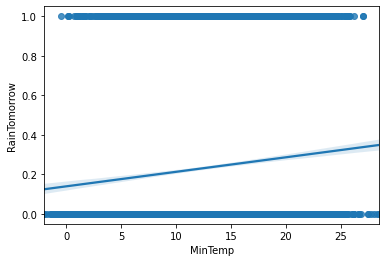

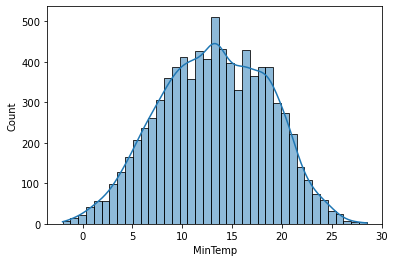

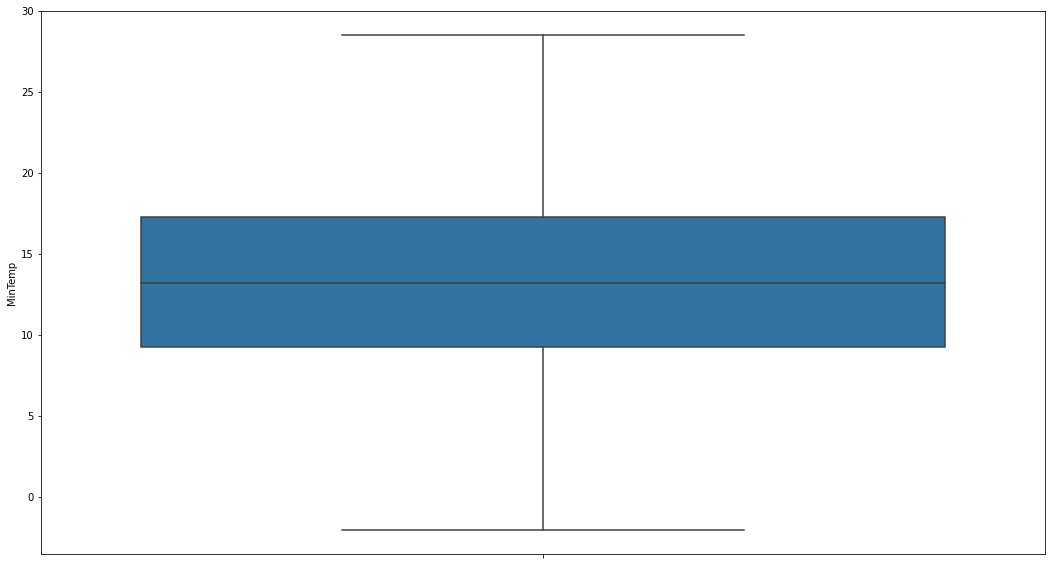

In [34]:
import seaborn as sns
sns.regplot(x="MinTemp",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x="MinTemp",data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='MinTemp',data=df)
plt.show()


The data is normal skewed with no outliers.

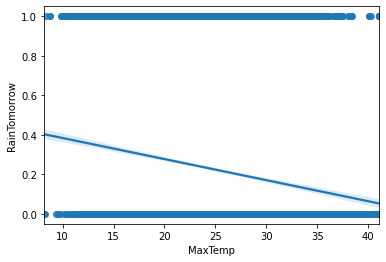

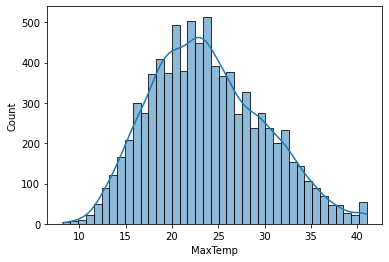

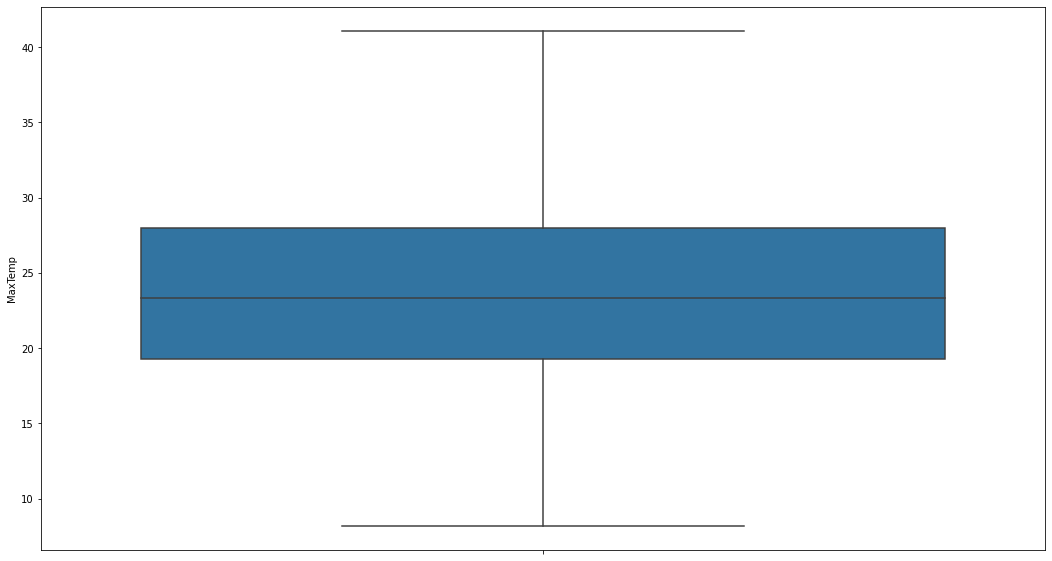

In [35]:
import seaborn as sns
sns.regplot(x="MaxTemp",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='MaxTemp',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='MaxTemp',data=df)
plt.show()


It is normal skewed with no outliers.

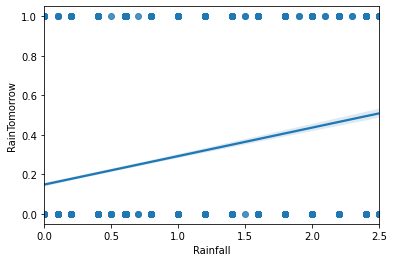

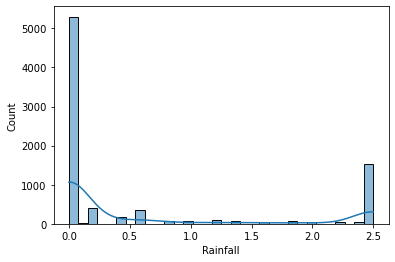

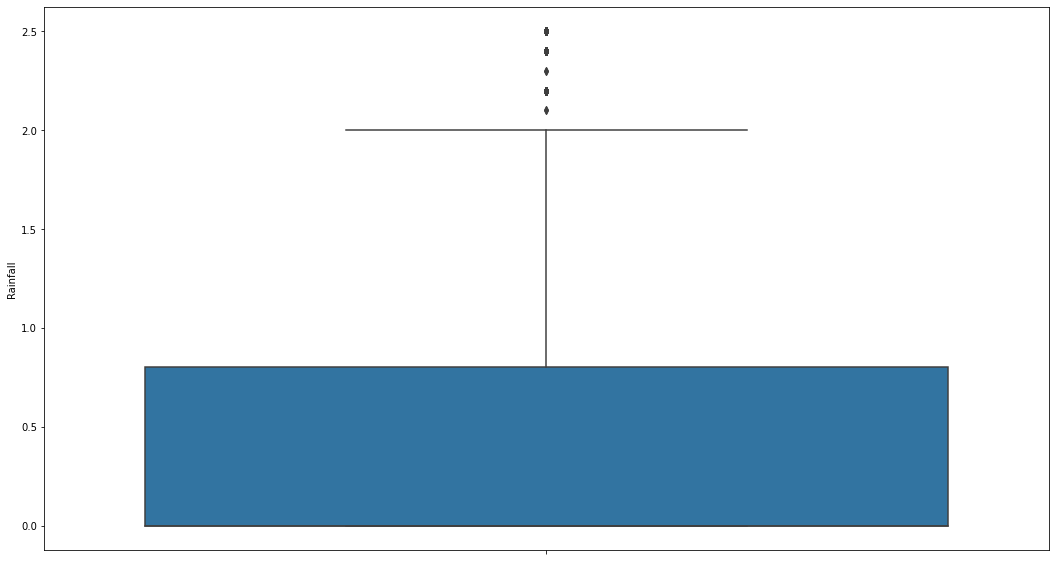

In [36]:
import seaborn as sns
sns.regplot(x="Rainfall",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Rainfall',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Rainfall',data=df)
plt.show()


data is left-skewed with outliers.

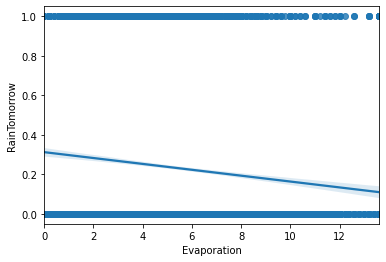

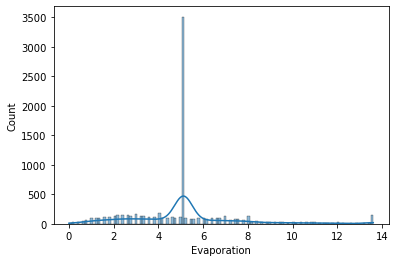

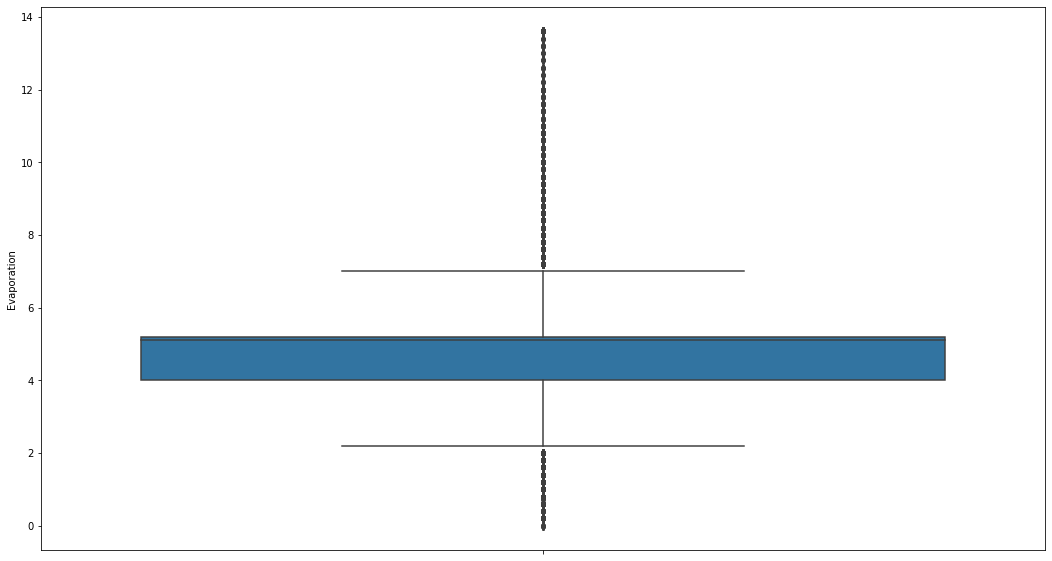

In [37]:
import seaborn as sns
sns.regplot(x="Evaporation",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Evaporation',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Evaporation',data=df)
plt.show()


Most of the data is between 4 to 6 with outliers.

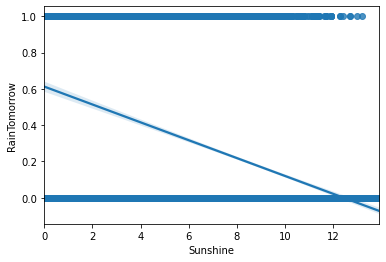

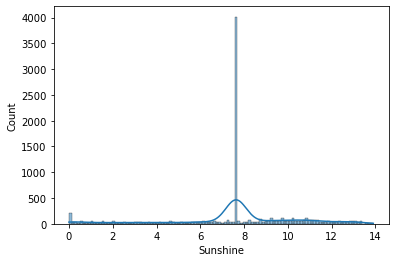

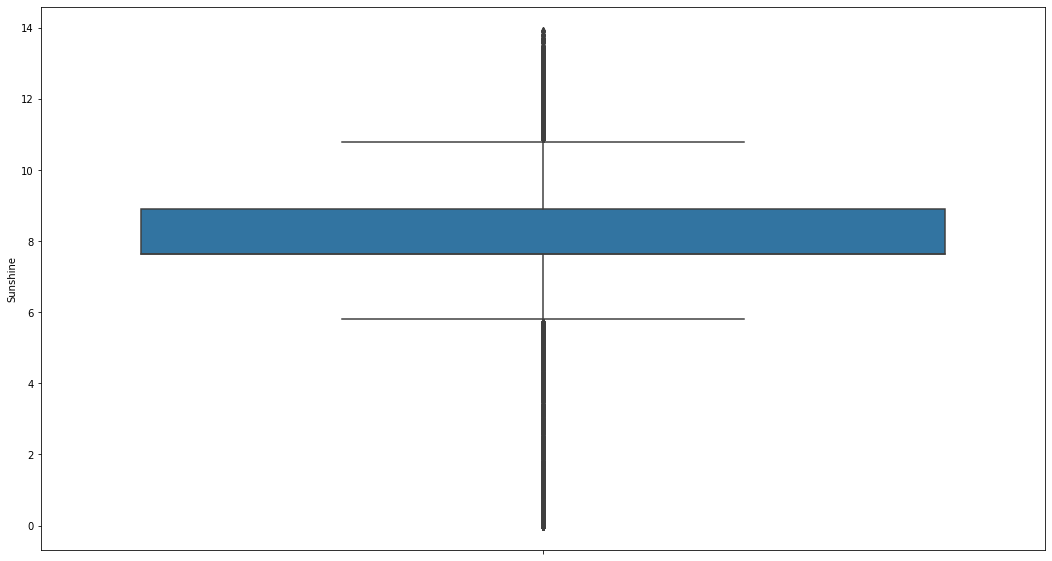

In [39]:
import seaborn as sns
sns.regplot(x="Sunshine",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Sunshine',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Sunshine',data=df)
plt.show()


Most of the data is between 6 to 8 with outliers.

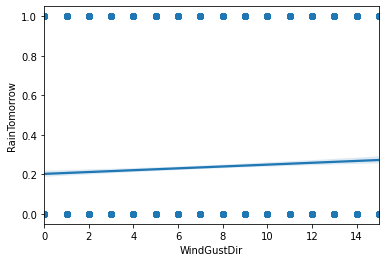

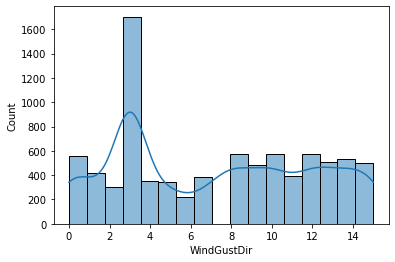

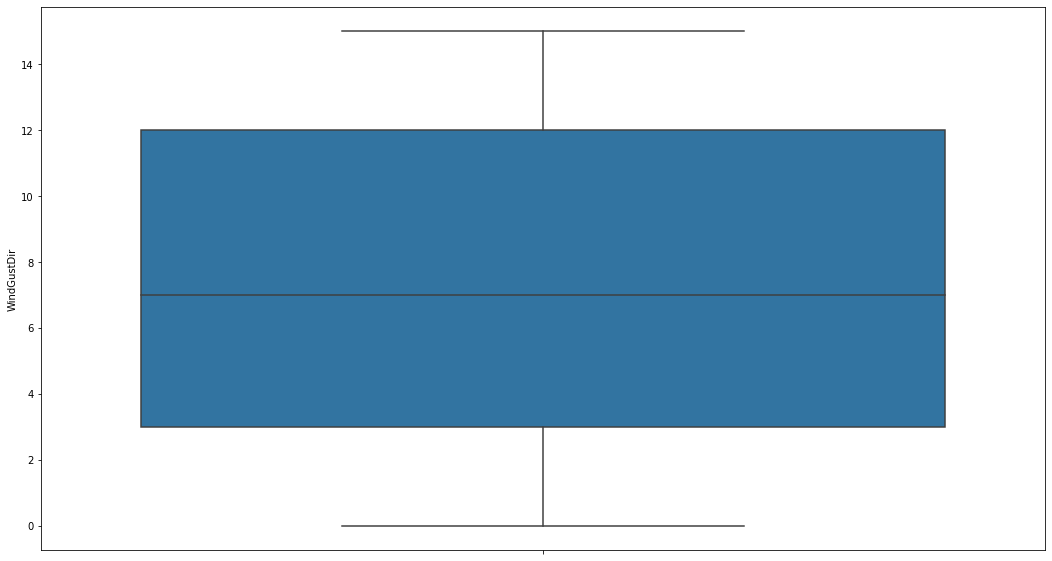

In [40]:
import seaborn as sns
sns.regplot(x="WindGustDir",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='WindGustDir',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='WindGustDir',data=df)
plt.show()


Most of the data is between 2 to 4 with no outliers.

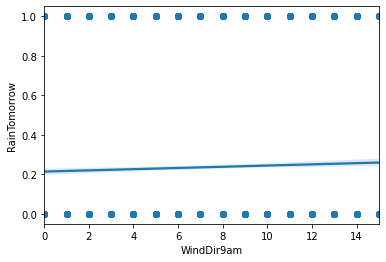

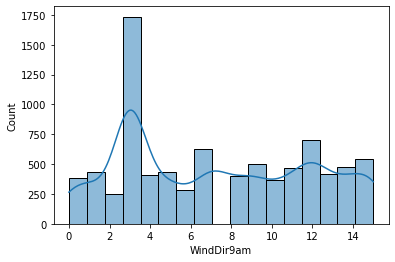

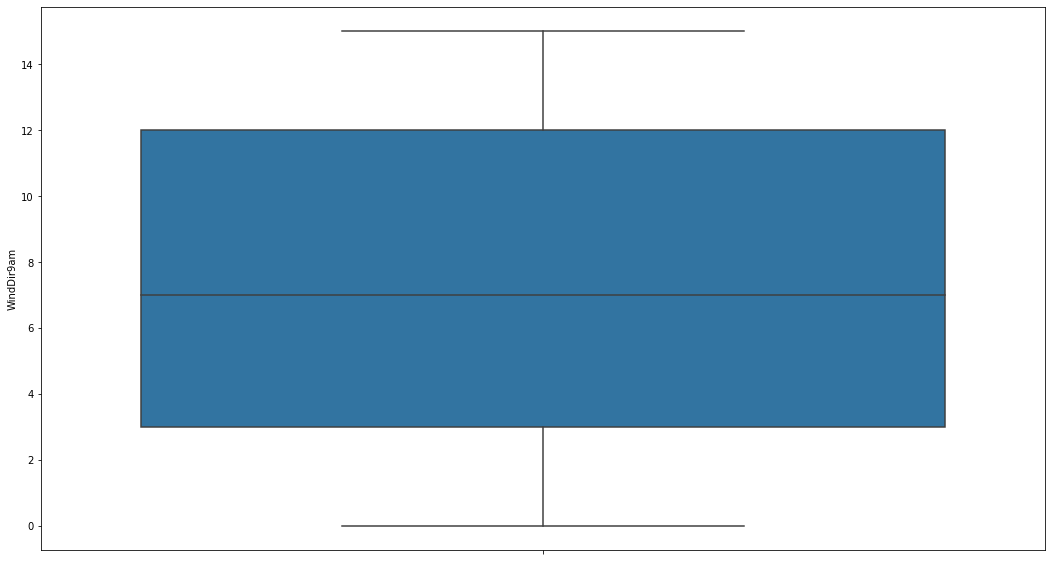

In [41]:
import seaborn as sns
sns.regplot(x="WindDir9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='WindDir9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='WindDir9am',data=df)
plt.show()


In [ ]:
Most of the data is between 2 to 4 with no outliers.

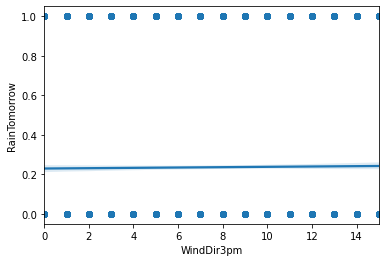

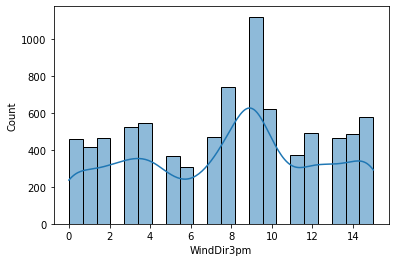

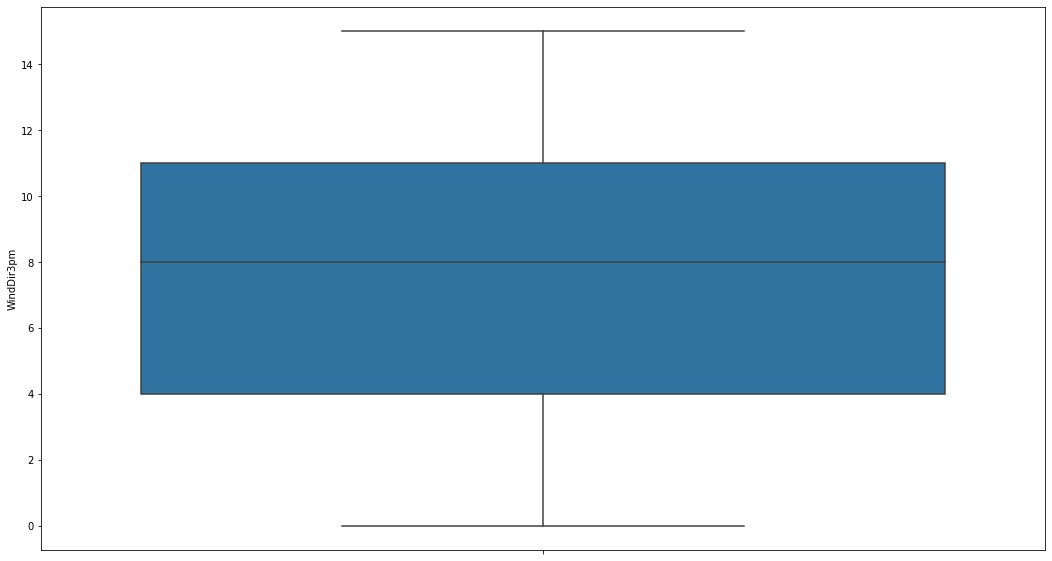

In [23]:
import seaborn as sns
sns.regplot(x="WindDir3pm",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='WindDir3pm',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='WindDir3pm',data=df)
plt.show()


Most of the data is between 8 to 10 with no outliers.

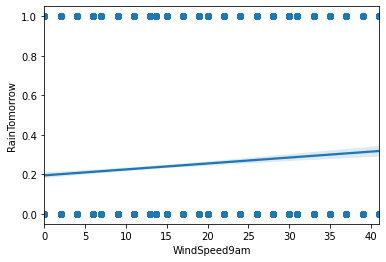

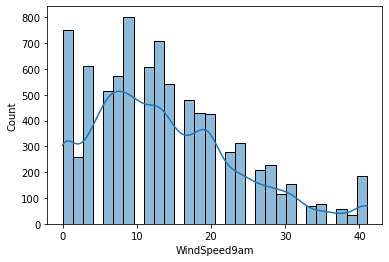

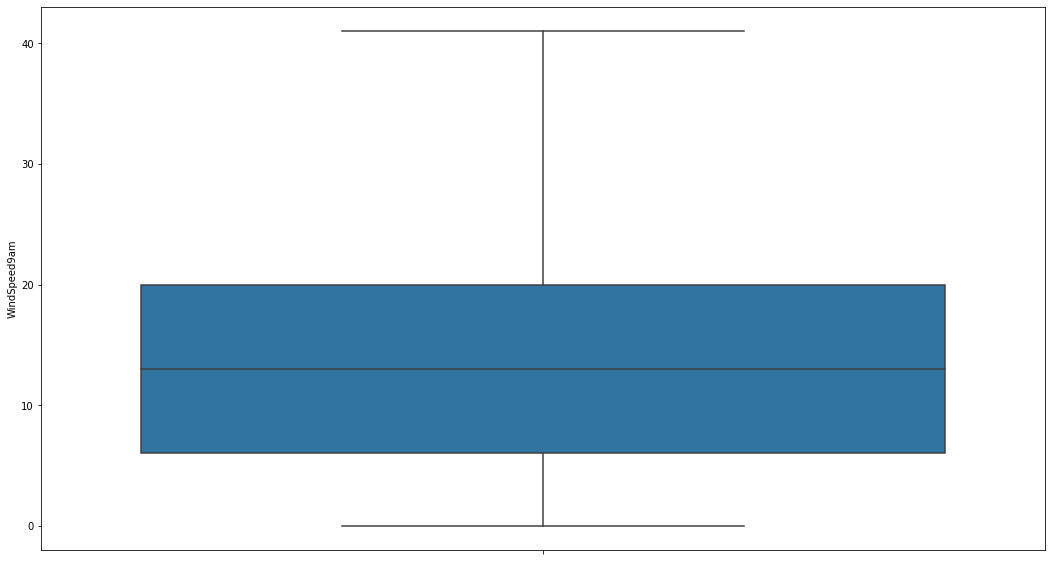

In [24]:
import seaborn as sns
sns.regplot(x="WindSpeed9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='WindSpeed9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='WindSpeed9am',data=df)
plt.show()


The data is left skewed with no outliers.

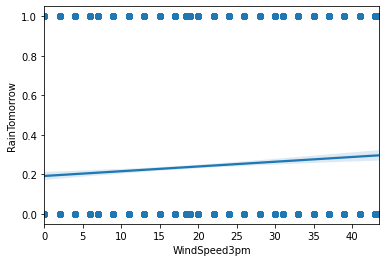

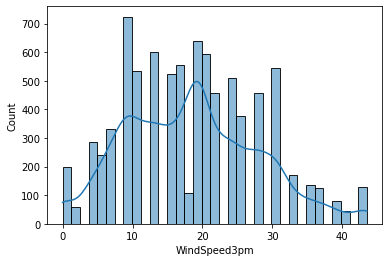

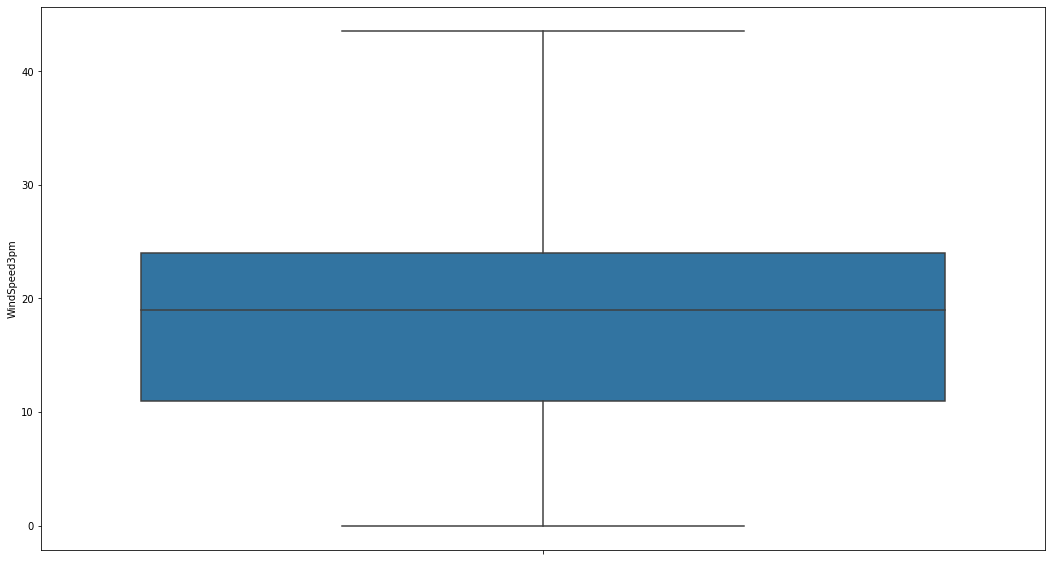

In [25]:
import seaborn as sns
sns.regplot(x="WindSpeed3pm",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='WindSpeed3pm',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='WindSpeed3pm',data=df)
plt.show()


The data is normal skewed with no outliers.

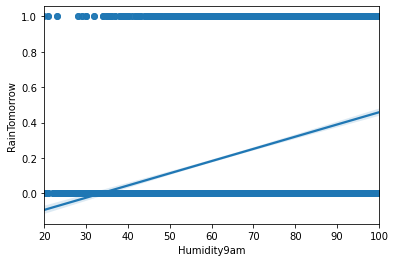

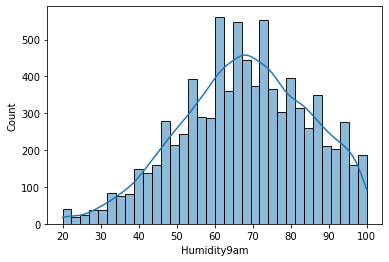

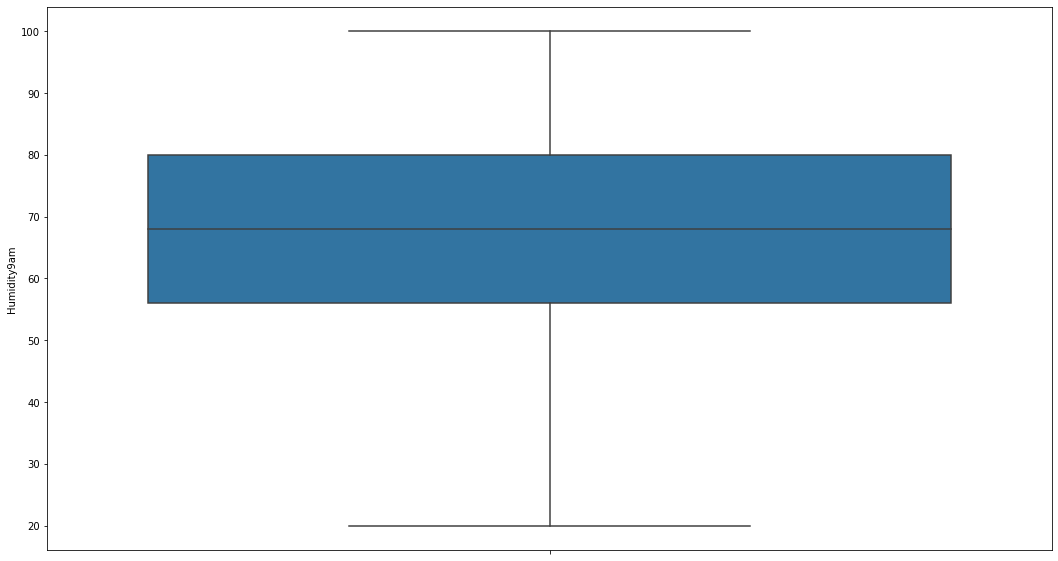

In [26]:
import seaborn as sns
sns.regplot(x="Humidity9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Humidity9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Humidity9am',data=df)
plt.show()


The data is normal skewed with no outliers.

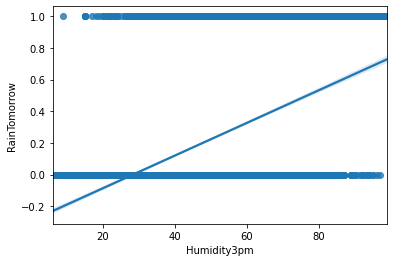

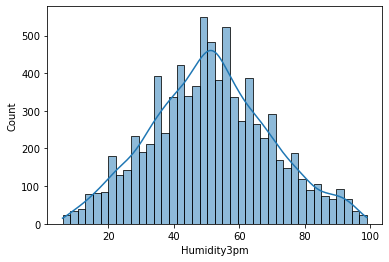

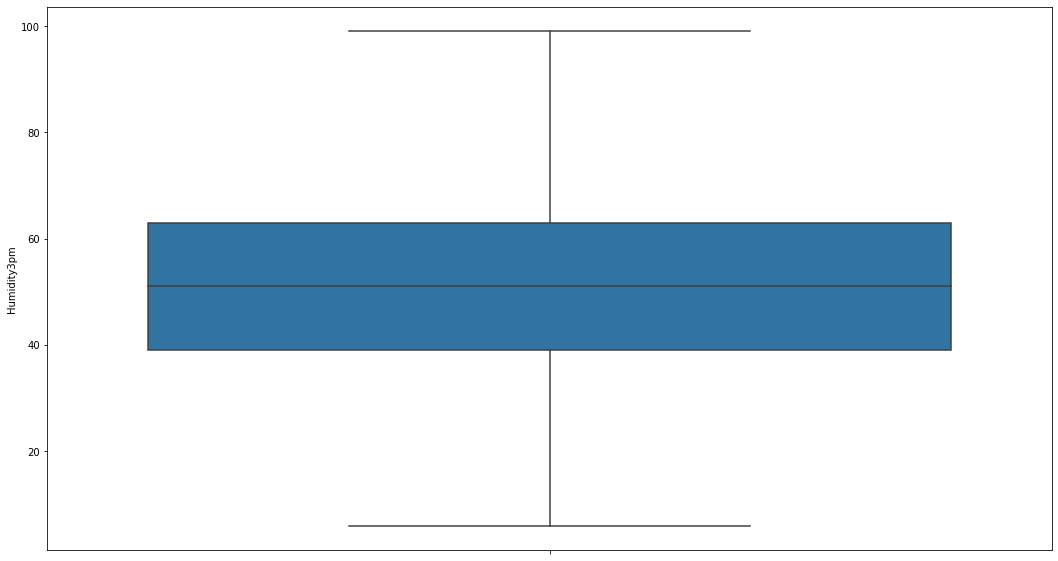

In [27]:
import seaborn as sns
sns.regplot(x="Humidity3pm",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Humidity3pm',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Humidity3pm',data=df)
plt.show()


The data is normal skewed with no outliers

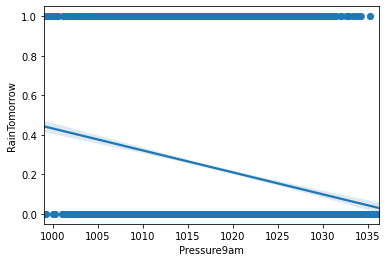

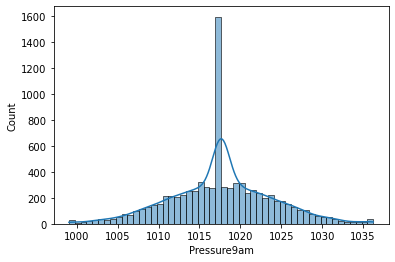

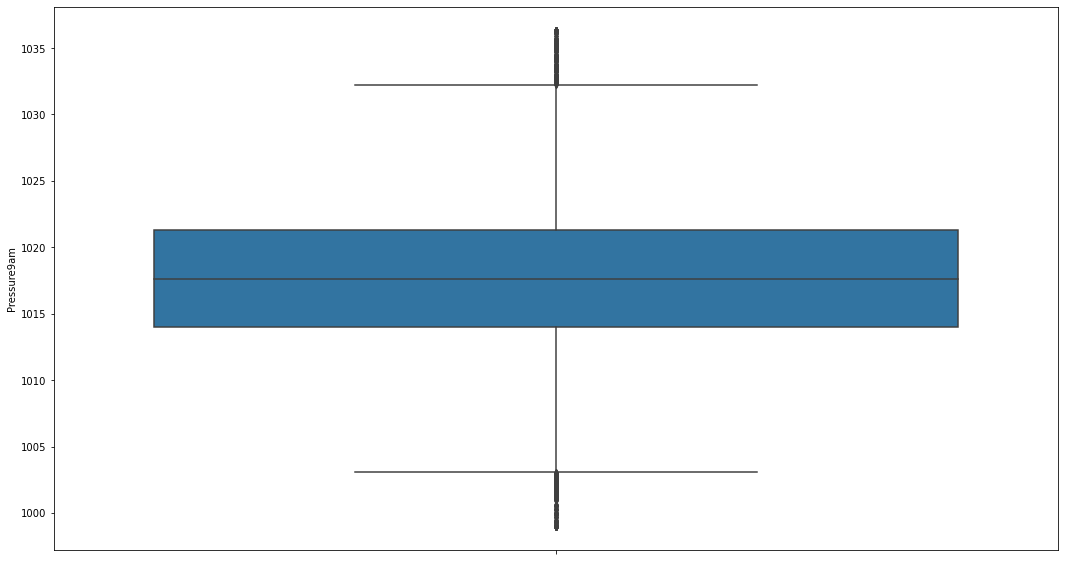

In [28]:
import seaborn as sns
sns.regplot(x="Pressure9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Pressure9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Pressure9am',data=df)
plt.show()


Most of the data is between 1015 to 1020 with outliers.

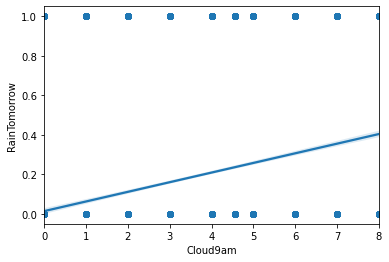

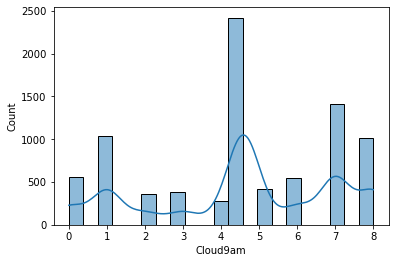

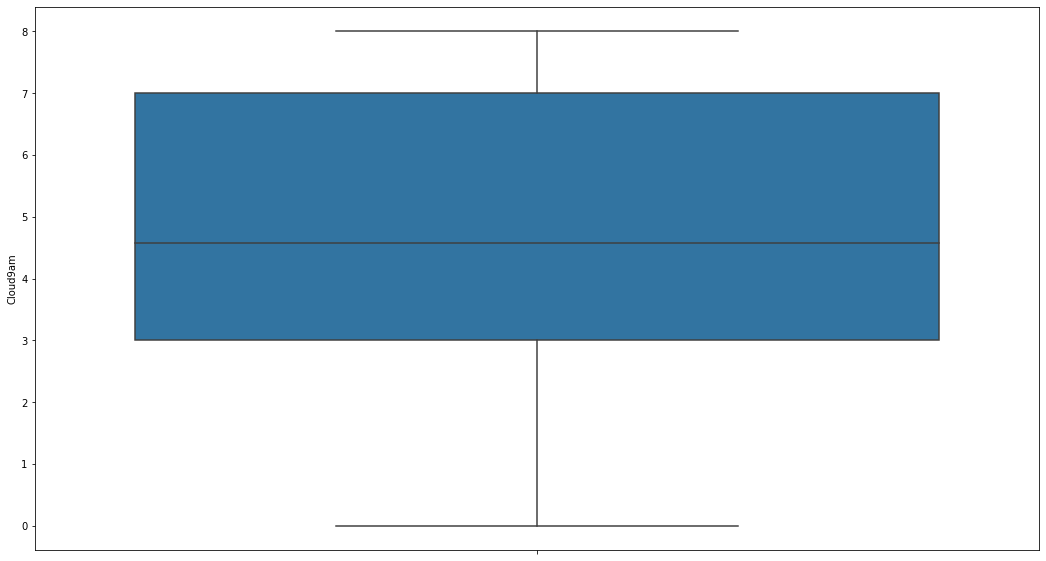

In [29]:
import seaborn as sns
sns.regplot(x="Cloud9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Cloud9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Cloud9am',data=df)
plt.show()


Most of the data is between 4 to 5 with no outliers.

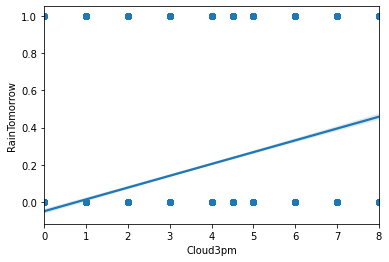

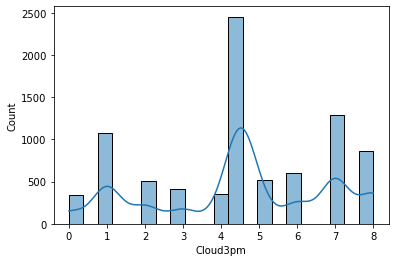

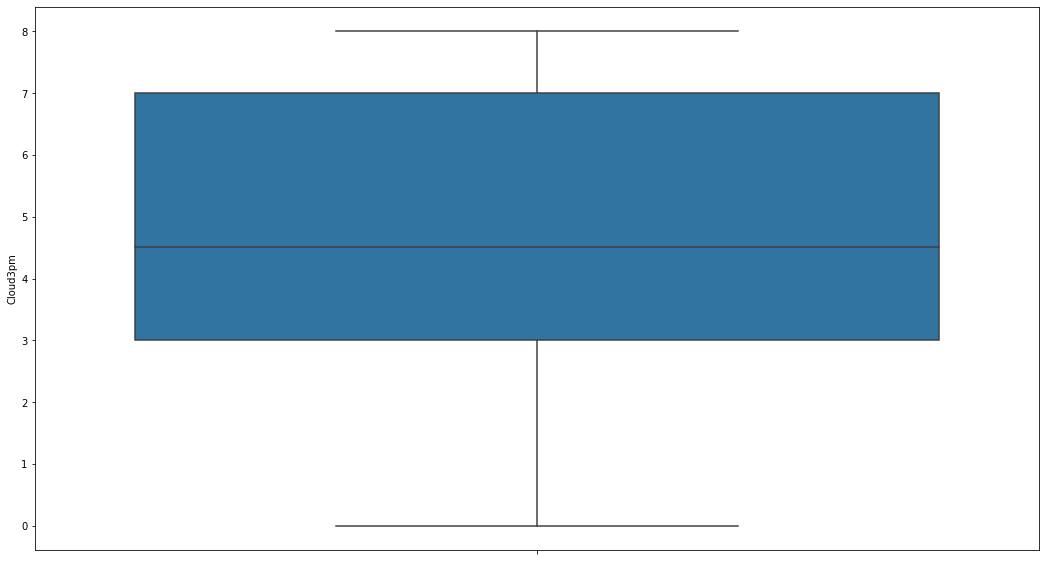

In [31]:
import seaborn as sns
sns.regplot(x="Cloud3pm",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Cloud3pm',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Cloud3pm',data=df)
plt.show()


Most of the data is between 4 to 5 with no outliers.

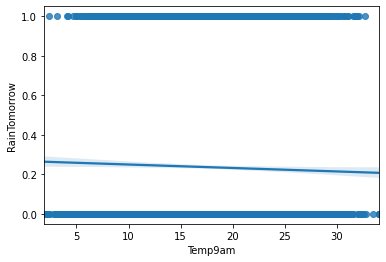

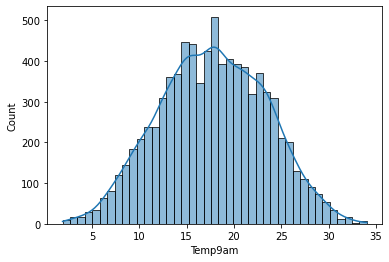

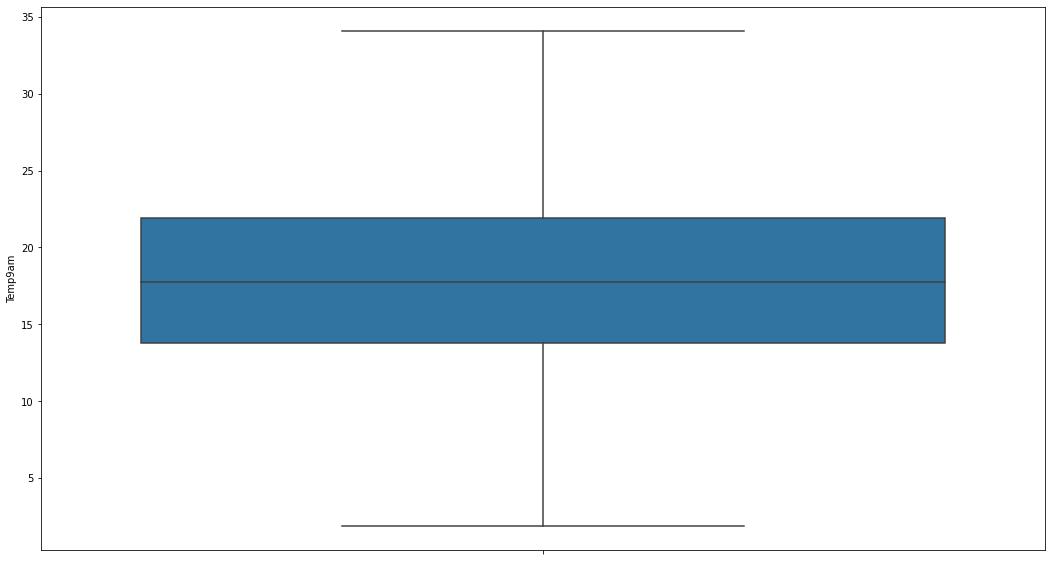

In [32]:
import seaborn as sns
sns.regplot(x="Temp9am",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='Temp9am',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='Temp9am',data=df)
plt.show()


The data is normal skewed with no outliers.

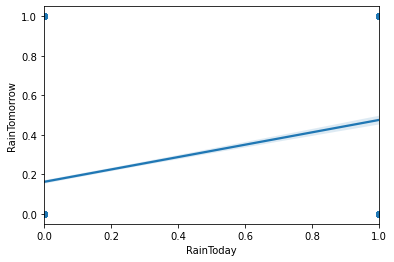

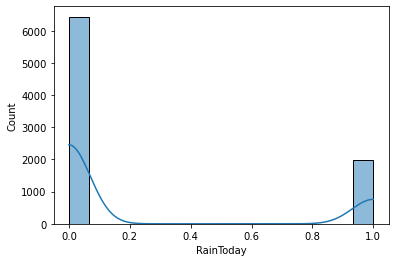

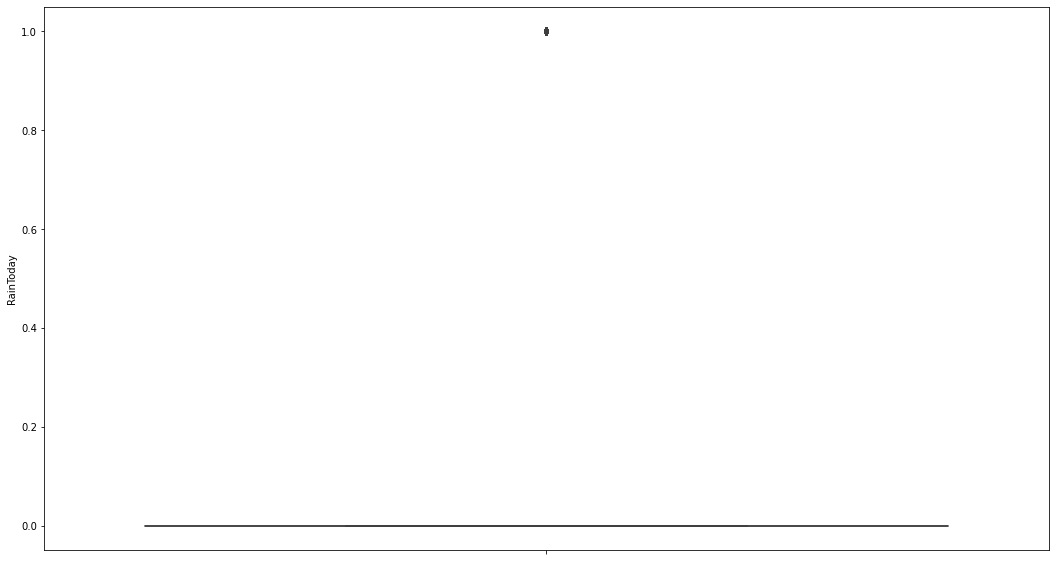

In [33]:
import seaborn as sns
sns.regplot(x="RainToday",y="RainTomorrow",data=df)
plt.show()
sns.histplot(x='RainToday',data=df,kde=True)
plt.show()
plt.figure(figsize=(18,10))
sns.boxplot(y='RainToday',data=df)
plt.show()


Most of the data said that there is no rain today.

# SKEWNESS

In [115]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.359010
Rainfall         1.239510
Evaporation      1.051138
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed    0.621953
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.737849
WindSpeed3pm     0.335023
Humidity9am     -0.241053
Humidity3pm      0.118281
Pressure9am      0.007925
Pressure3pm      0.029556
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.021892
Temp3pm          0.364360
RainToday        1.242362
RainTomorrow     1.241588
year             0.418663
month            0.039388
day              0.004260
dtype: float64

There is skewness present in all columns.

In [116]:
skew=('Rainfall','Evaporation','RainToday')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [117]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.359010
Rainfall         1.093196
Evaporation     -0.815632
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed    0.621953
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.737849
WindSpeed3pm     0.335023
Humidity9am     -0.241053
Humidity3pm      0.118281
Pressure9am      0.007925
Pressure3pm      0.029556
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.021892
Temp3pm          0.364360
RainToday        1.242362
RainTomorrow     1.241588
year             0.418663
month            0.039388
day              0.004260
dtype: float64

In [118]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8425, 25)

In [119]:
threshold=3
print(np.where(z>3))

(array([  12,  567,  568,  602,  683,  748, 1008, 1369, 1387, 1413, 1426,
       1467, 1480, 2838, 3051, 3058, 3059, 3098, 3139, 3167, 3212, 3303,
       3449, 3690, 3903, 3910, 3911, 3950, 3991, 4019, 4064, 4155, 4301,
       4527, 4528, 4678, 4728, 4741, 4763, 4771, 4779, 4780, 4785, 4797,
       4811, 4812, 4814, 4854, 4895, 4960, 5086, 5091, 5092, 5103, 5108,
       5122, 5143, 5145, 5147, 5164, 5165, 5168, 5173, 5175, 5176, 5214,
       5237, 5338, 5339, 5489, 5539, 5552, 5574, 5582, 5590, 5591, 5596,
       5608, 5622, 5623, 5625, 5665, 5706, 5771, 5897, 5902, 5903, 5914,
       5919, 5933, 5954, 5956, 5958, 5975, 5976, 5979, 5984, 5986, 5987,
       6025, 6048, 6252, 6262, 6617, 6626, 6660, 6758, 6766, 6780, 6782,
       6786, 6793, 6794, 7128, 7132, 7142, 7186, 7187, 7463, 7468, 7473,
       7494, 7633, 7735, 8114, 8119], dtype=int64), array([15, 15, 15, 15, 15, 15,  4,  4,  4,  4,  4,  4,  4,  4, 15, 15, 15,
        4,  4, 15, 15, 15, 15,  4, 15, 15, 15,  4,  4, 15, 15, 15, 15

In [120]:
df_new=df.drop([ 270,  295,  465,  465,  566,  599,  952, 1008, 1345, 1351, 1404,
       1428, 3043, 3259, 3427, 3427, 3885, 4101, 4269, 4269, 4533, 4574,
       4642, 4711, 4719, 4747, 4768, 4785, 4798, 4805, 4972, 4992, 5014,
       5025, 5061, 5067, 5082, 5082, 5086, 5103, 5106, 5310, 5351, 5419,
       5488, 5496, 5524, 5545, 5562, 5575, 5582, 5749, 5769, 5791, 5802,
       5838, 5844, 5859, 5859, 5863, 5880, 5883, 6553, 6626, 6631, 6632,
       6645, 6667, 6718, 6865, 7002, 7070, 7116, 7343, 7344, 7349, 7668,
       7677, 7729, 7981, 7999],axis=0)

In [121]:
df_new.shape

(8349, 25)

In [122]:
df_new.skew()

Location        -0.054248
MinTemp         -0.091474
MaxTemp          0.355316
Rainfall         1.093699
Evaporation     -0.811353
Sunshine        -0.716477
WindGustDir      0.122982
WindGustSpeed    0.623350
WindDir9am       0.174767
WindDir3pm      -0.118396
WindSpeed9am     0.739364
WindSpeed3pm     0.332292
Humidity9am     -0.243315
Humidity3pm      0.119062
Pressure9am      0.007292
Pressure3pm      0.028082
Cloud9am        -0.363527
Cloud3pm        -0.273311
Temp9am         -0.023409
Temp3pm          0.360905
RainToday        1.243184
RainTomorrow     1.243184
year             0.411116
month            0.033879
day              0.005597
dtype: float64

In [123]:
df=df_new

Now we can move forward.

# OUTLIERS

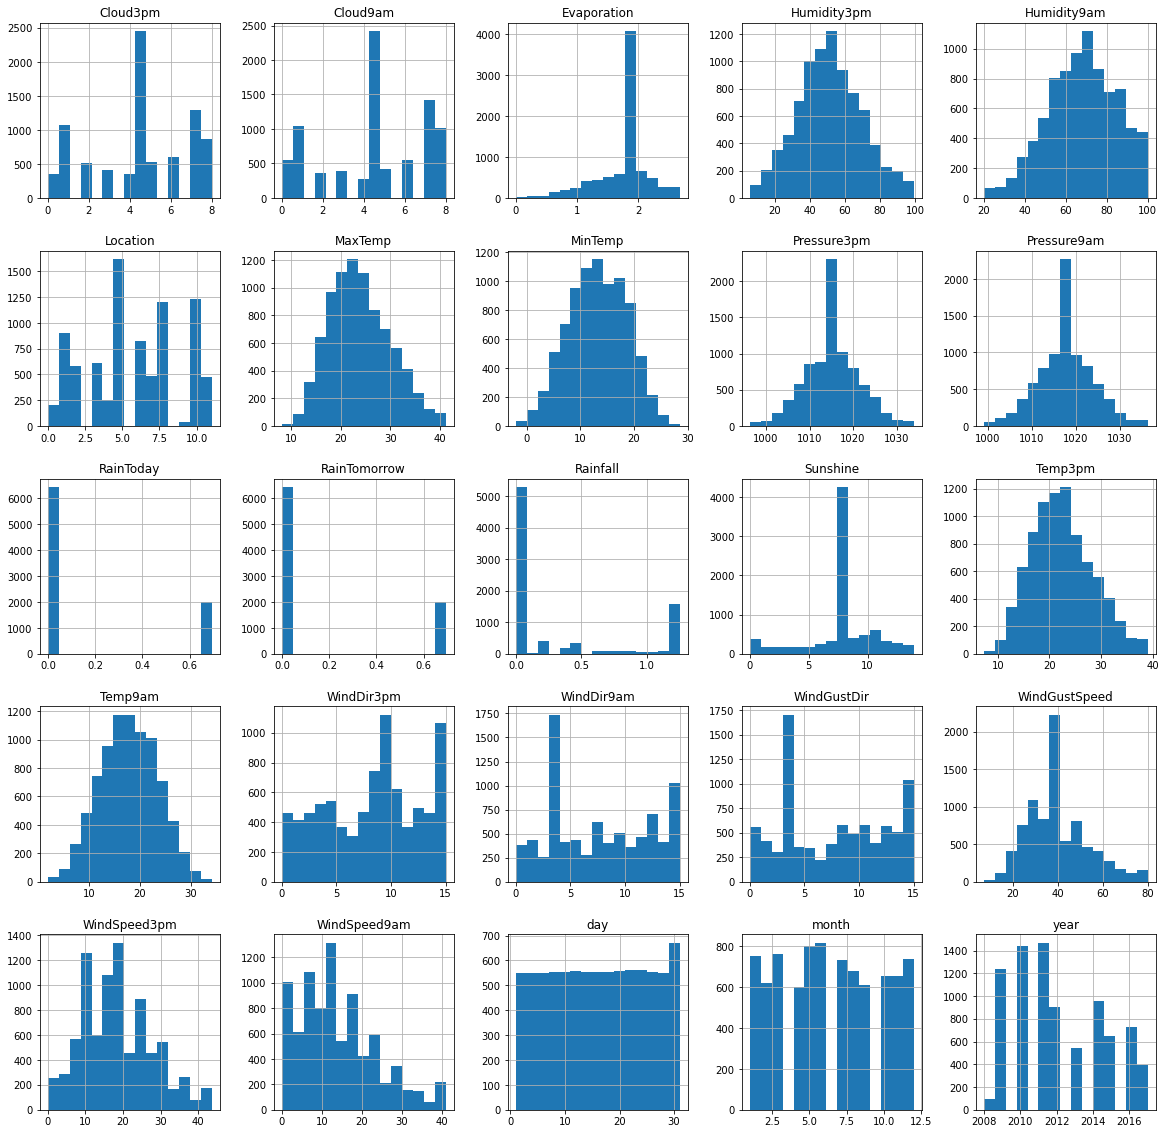

In [32]:
# to check all variables at once

df.hist( bins = 15, figsize = (20,20))
plt.show()

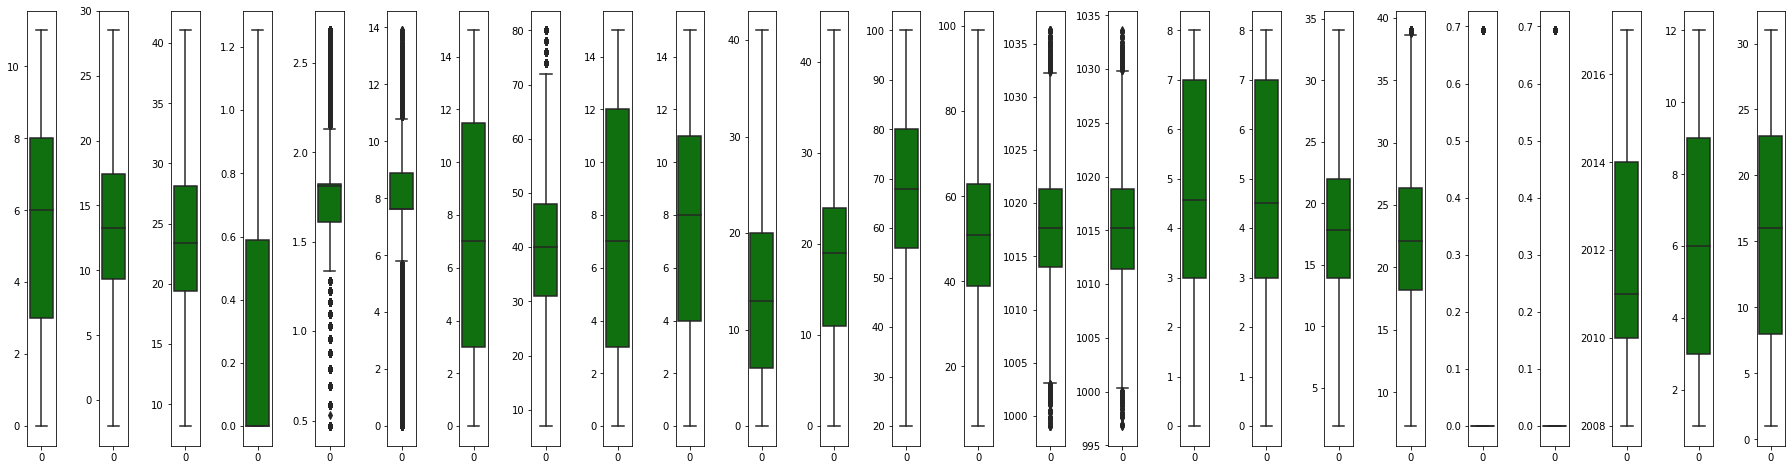

In [44]:
import seaborn as sns
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Correlation

<AxesSubplot:>

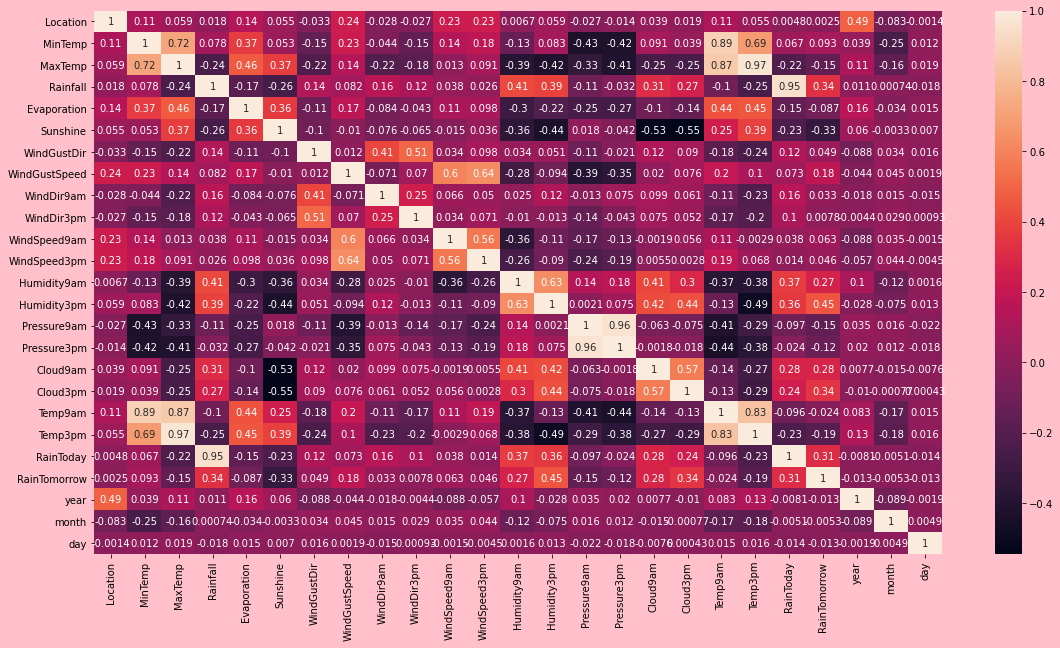

In [48]:
# plotting heatmap
plt.figure(figsize=[19,10],facecolor='pink')
sns.heatmap(df_new.corr(),annot=True)

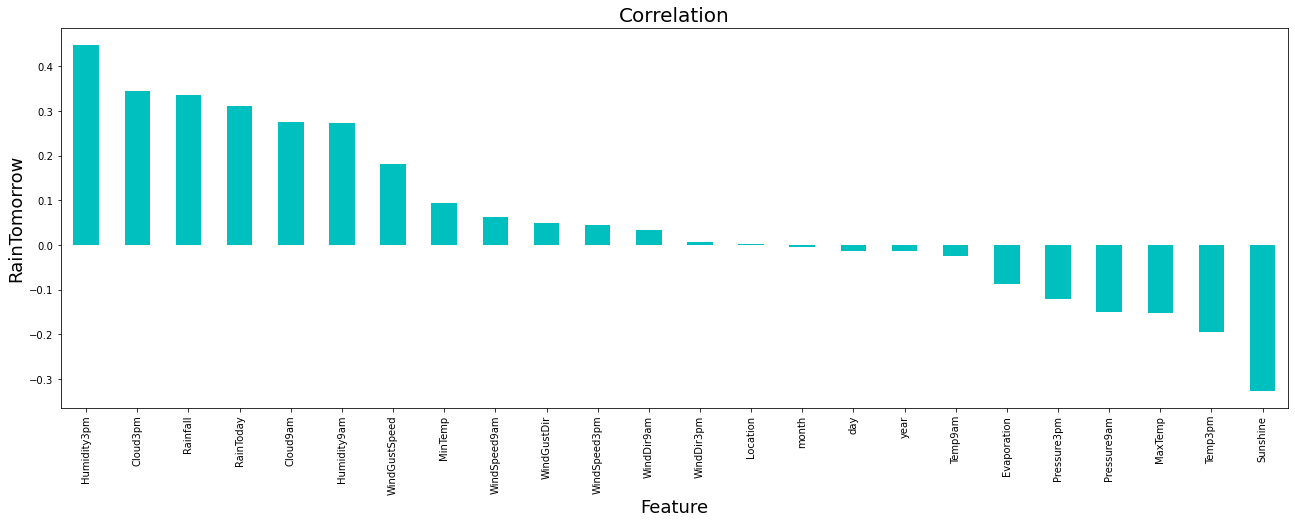

In [50]:
plt.figure(figsize=(22,7))
df_new.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('RainTomorrow',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

Rain tomorrow column is highly correlated with Humidity3pm and less correlated with Sunshine.

# Scalling the data using Min-Max Scaler

In [33]:
### Define X&Y ###
x = df.drop(columns = ['Rainfall'],axis=1)
y = df['Rainfall']


In [34]:
x.shape

(8425, 24)

In [35]:
y.shape

(8425,)

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Training and Testing the Model

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Linear Regressor

In [38]:
maxAcc=0
MaxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.9313382726488629 on random state 28


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=28)

In [40]:
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

Linear coefficients : [-2.51608301e-04  7.76225747e-03 -2.24690938e-03 -3.02865102e-02
  7.02068386e-04  3.31329869e-04  4.18321239e-04  4.48014948e-04
  1.40227162e-03  3.42143534e-04  3.32046591e-04  2.03086016e-03
 -3.51726130e-04 -7.26179353e-03  5.56761365e-03  1.03864733e-03
  5.55001408e-04 -3.03346864e-03 -6.27223695e-04  1.52461537e+00
  2.74256299e-02  4.37722928e-03  3.46284647e-03 -1.61854488e-04]
Intercept : -7.117634040466616


In [42]:
pred_test=lr.predict(x_test)

In [43]:
print(r2_score(y_test,pred_test))

0.9249914196869462


In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.09436179168128818
MSE: 0.019661414122730363
RMSE: 0.14021916460573555


<AxesSubplot:xlabel='Rainfall'>

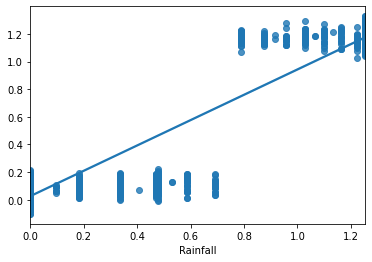

In [45]:
sns.regplot(x=y_test,y=pred_test)

# Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred_t=rdr.predict(x_train)
pred=rdr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9459276594277518


In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0721124715499842
MSE: 0.01417356089315648
RMSE: 0.11905276516384018


<AxesSubplot:xlabel='Rainfall'>

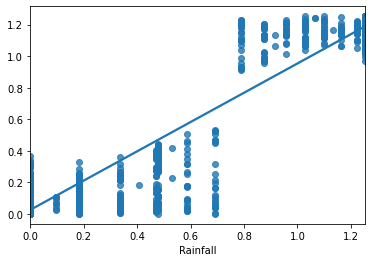

In [48]:
sns.regplot(x=y_test,y=pred)

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred4=dtr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9459276594277518


Text(0, 0.5, 'Predicted Y')

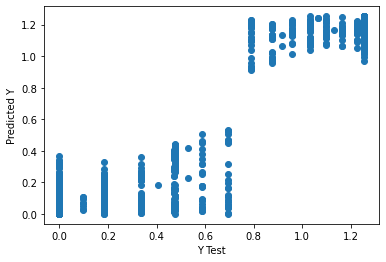

In [50]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0721124715499842
MSE: 0.01417356089315648
RMSE: 0.11905276516384018


# AdaBoostRegressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred2=ada.predict(x_test)
acc=r2_score(y_test,pred2)
print(acc)

0.9037631833515797


In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 0.1359575081454219
MSE: 0.025225806142188393
RMSE: 0.15882633957309597


<AxesSubplot:xlabel='Rainfall'>

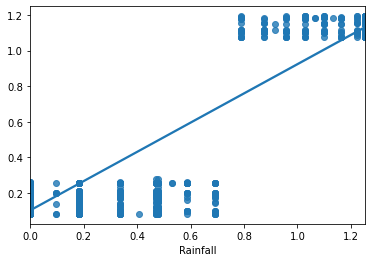

In [54]:
sns.regplot(x=y_test,y=pred2)

# KNeighborsRegressor

In [55]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
acc=r2_score(y_test,pred3)
print(acc)

0.31833157647047494


In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

MAE: 0.28782649181197717
MSE: 0.17868042713868415
RMSE: 0.42270607653390097


Text(0, 0.5, 'Predicted Y')

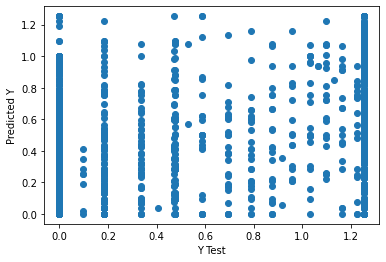

In [57]:
plt.scatter(x=y_test,y=pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [58]:
import statsmodels.api as sm

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     4063.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:00:31   Log-Likelihood:                 4520.5
No. Observations:                8425   AIC:                            -8991.
Df Residuals:                    8400   BIC:                            -8815.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.3152      1.572     -5.288

# Cross-Validation of the model:

In [59]:

test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,5):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cv score is {cv_mean} and accuracy for testing is { test_accuracy}")
    print("\n")


at cross fold2 the cv score is 0.9190127462131521 and accuracy for testing is 0.9249914196869462


at cross fold3 the cv score is 0.9186219381578414 and accuracy for testing is 0.9249914196869462


at cross fold4 the cv score is 0.9188774951593728 and accuracy for testing is 0.9249914196869462




<function matplotlib.pyplot.show(close=None, block=None)>

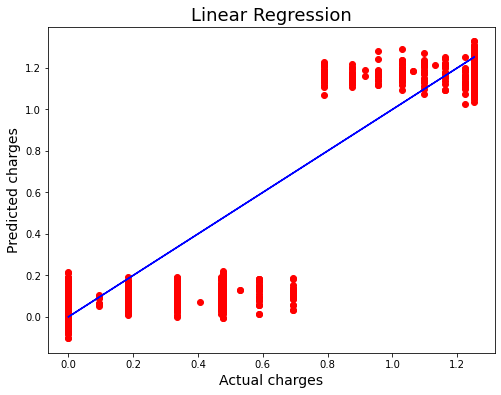

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show

# Regularization

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10,100],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [63]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

91.82300002842125

In [64]:
lss=r2_score(y_test,pred_ls)
lss*100

92.495861382678

In [65]:
cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()
cv_mean*100

91.88870840183515

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [67]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 94.53782421546273
Cross Val Score: 91.78414477055739


# Conclusion

In [68]:
import pickle
filename='Rain_Fall.pkl'
pickle.dump(rf,open(filename,'wb'))

In [69]:
import pickle
loaded_model=pickle.load(open('Rain_Fall.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

94.53782421546273


In [70]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","original"])

In [71]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780
Predicted,0.104301,0.011474,1.252473,0.082888,0.007011,0.028937,0.075782,0.128188,0.024098,0.014022,...,1.247353,0.075135,0.00547,1.222354,1.210956,0.034171,0.03166,0.017105,0.325773,0.07539
original,0.104301,0.011474,1.252473,0.082888,0.007011,0.028937,0.075782,0.128188,0.024098,0.014022,...,1.247353,0.075135,0.00547,1.222354,1.210956,0.034171,0.03166,0.017105,0.325773,0.07539


# After training or testing the model with different Classifier.The Highest accuracy is given by RandomForest Classifier that is 94%. And we do Cross validation the Model gives 91% score for cross validation. And Mean square Error is also 0.01.

# Prediction with RainTomorrow

In [124]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.470004,1.811547,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0,2008,12,1
1,1,7.4,25.1,0.000000,1.811547,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0,2008,12,2
2,1,12.9,25.7,0.000000,1.811547,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0,2008,12,3
3,1,9.2,28.0,0.000000,1.811547,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0,2008,12,4
4,1,17.5,32.3,0.693147,1.811547,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,2008,12,5


In [130]:
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']       

In [131]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.841799709724238 on random state 64


In [132]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 64)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 64)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 64)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =64)
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=64)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [133]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8315751832647953
[1]K Nearest Neighbor Training Accuracy: 0.8762739138208475
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.835687466475952
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7675666011085285
[4]Gaussian Naive Bayes Training Accuracy: 0.7790094761308779
[5]Decision Tree Classsifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.990523869122117


# Confusion Matrix

In [134]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[1977  108]
 [ 388  283]]
Model[0] Testing Accuracy = "0.8200290275761973 !"
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2085
           1       0.72      0.42      0.53       671

    accuracy                           0.82      2756
   macro avg       0.78      0.68      0.71      2756
weighted avg       0.81      0.82      0.80      2756



[[1950  135]
 [ 355  316]]
Model[1] Testing Accuracy = "0.8222060957910015 !"
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2085
           1       0.70      0.47      0.56       671

    accuracy                           0.82      2756
   macro avg       0.77      0.70      0.73      2756
weighted avg       0.81      0.82      0.81      2756



[[1965  120]
 [ 373  298]]
Model[2] Testing Accuracy = "0.8211175616835994 !"
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2085

# Cross Validation

In [135]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.8227369108397943


In [136]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.8500412954797415


In [137]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.7930292082103021


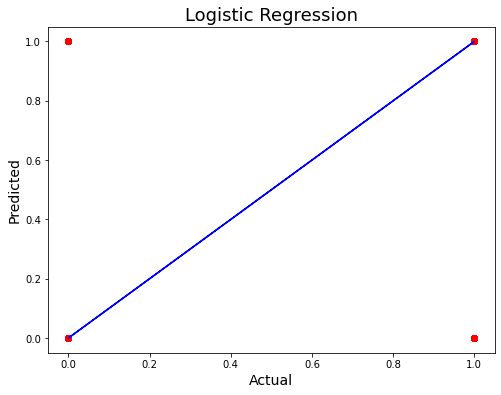

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [140]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [141]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [142]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8367198838896952

# AUC-ROC Curve

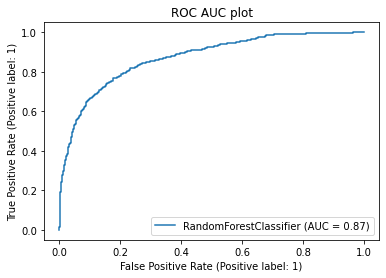

In [143]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [144]:
import pickle
filename='RainTomorrow.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [145]:
import pickle
loaded_model=pickle.load(open('RainTomorrow.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.67198838896952


In [146]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [147]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755
Predicted,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
original,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# After training or testing the model with different Classifier.The Highest accuracy is given by RandomForest Classifier that is .83%. And we do Cross validation the Model gives .85% score for cross validation. And AUC ROC curve is .87%